In [189]:

library(ergm)


In [190]:
data <- read.csv("edge_data_2018_normalized.csv")
data

year,exporter_id,importer_id,section_no,value
<int>,<chr>,<chr>,<int>,<dbl>
2018,ABW,ARE,3,6.997162e-10
2018,ABW,ARE,4,3.420166e-07
2018,ABW,ARE,6,1.313903e-07
2018,ABW,ARE,7,5.140412e-07
2018,ABW,ARE,10,1.368551e-08
2018,ABW,ARE,11,3.611943e-09
2018,ABW,ARE,13,3.049043e-10
2018,ABW,ARE,15,2.300894e-07
2018,ABW,ARE,16,4.286086e-06


In [191]:
data <- data[data$exporter_id != data$importer_id, ]

In [192]:
# Ensure only 2018 data
data <- data[data$year == 2018, ]
# data

In [193]:
# Aggregate data by exporter_id and importer_id, summing up the 'value' and 'section_no'
library(dplyr)
data_aggregated <- data %>%
  group_by(exporter_id, importer_id, ) %>%
  summarise(value = sum(value,na.rm = TRUE), .groups = 'drop')

In [194]:
# Create a network object from the aggregated data
library(network)


In [195]:
trade_network<-network(data_aggregated,directed=TRUE,vertices=NULL,matrix.type="edgelist",ignore.eval=FALSE)

In [196]:
# Add edge attributes
set.edge.value(trade_network, "value", data$value)
set.edge.value(trade_network, "section_no", data$section_no)
set.edge.value(trade_network, "year", data$year)



In [197]:
colnames(data_aggregated)


[1] "exporter_id" "importer_id" "value"

In [198]:
colnames(trade_network)

NULL

In [199]:
section_no_nodal <- data %>%
  group_by(exporter_id) %>%
  summarize(most_common_section = names(sort(table(section_no), decreasing = TRUE))[1]) %>%
  select(exporter_id, most_common_section)

In [200]:
network::set.vertex.attribute(trade_network, "section_no", section_no_nodal$most_common_section)

In [201]:
# Add 'value' as an edge attribute
set.edge.value(trade_network, "value", data$value)


In [202]:
# Fit the ERGM model with edgecov for 'value' and nodematch for 'section_no'
model <- ergm(trade_network ~ edges + nodematch("section_no") + edgecov(trade_network, "value"))


Starting maximum pseudolikelihood estimation (MPLE):

Obtaining the responsible dyads.

Evaluating the predictor and response matrix.

Warning message in mple.existence(pl):
"The MPLE does not exist!"
Maximizing the pseudolikelihood.

Warning message in ergm.mple(s, s.obs, init = init, control = control, verbose = verbose, :
"GLM may be separable; restarting glm with zeros.
"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Finished MPLE.

Evaluating log-likelihood at the estimate. 




In [203]:
summary(model)

Call:
ergm(formula = trade_network ~ edges + nodematch("section_no") + 
    edgecov(trade_network, "value"))

Maximum Likelihood Results:

                       Estimate Std. Error MCMC % z value Pr(>|z|)    
edges                -2.663e+00  3.417e-02      0 -77.915  < 1e-04 ***
nodematch.section_no -2.141e-01  5.632e-02      0  -3.801 0.000144 ***
edgecov.value         9.218e+09  1.093e+08      0  84.317  < 1e-04 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

     Null Deviance: 59688  on 43056  degrees of freedom
 Residual Deviance:  6348  on 43053  degrees of freedom
 
AIC: 6354  BIC: 6380  (Smaller is better. MC Std. Err. = 0)

In [204]:
# gof_results <- gof(model)

# # Summarize GOF results
# print(gof_results)

In [205]:
# # Plot the GOF results
# par(mfrow = c(2, 2)) # Arrange plots in a grid
# plot(gof_results)

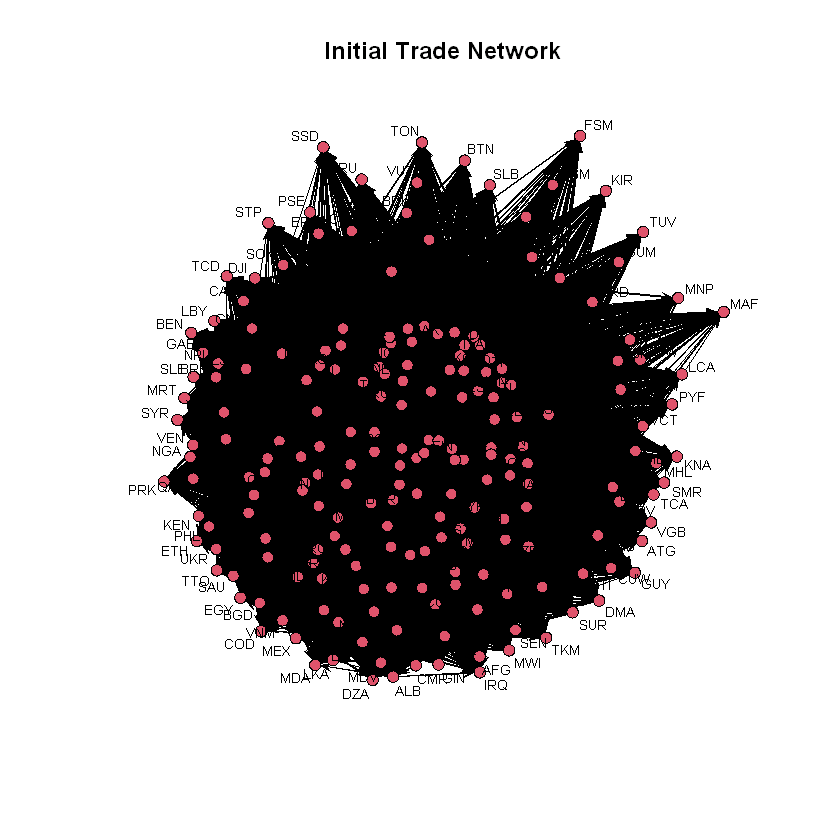

In [206]:
plot(trade_network,
     displaylabels = TRUE,
     label.cex = 0.7,
     main = "Initial Trade Network")

In [207]:
edge_probabilities <- predict(model, type = "response")
edge_probabilities

tail,head,p
<dbl>,<dbl>,<dbl>
100,39,0.06521082
25,138,0.06521082
68,58,0.05331359
47,38,0.05331359
60,203,0.05331359
9,189,0.06521082
118,202,0.06521082
108,60,0.05331359
133,202,0.05331359


In [208]:
# gwdegree_coefficient <- summary(model)$coefficients['gwdegree']
# gwdegree_coefficient

In [209]:
ergm_coefficients <- summary(model)$coefficients
print(ergm_coefficients)

                          Estimate   Std. Error MCMC %    z value     Pr(>|z|)
edges                -2.662696e+00 3.417419e-02      0 -77.915401 0.0000000000
nodematch.section_no -2.140809e-01 5.631867e-02      0  -3.801242 0.0001439725
edgecov.value         9.218233e+09 1.093276e+08      0  84.317499 0.0000000000


## 2019 dataset

In [210]:
# Simulate networks
simulated_networks <- simulate(model, nsim = 100, output = "network")

# Extract predicted links
predicted_links <- as.data.frame(simulated_networks[[1]], directed = TRUE)


In [211]:
predicted_probabilities <- predict(model,type="response", output = "matrix")
#predicted_probabilities

In [212]:
head(predicted_probabilities)

,ABW,AFG,AGO,ALB,AND,ARE,ARG,ARM,ASM,ATG,⋯,VCT,VEN,VGB,VNM,VUT,WSM,YEM,ZAF,ZMB,ZWE
ABW,0.00000000,0.06521082,0.05331359,0.06521082,0.06521082,1.00000000,1.0000000,0.05331359,0.05331359,0.05331359,⋯,0.05331359,0.05331359,0.05331359,0.06521082,0.05331359,0.05331359,1.00000000,1.0000000,1.00000000,0.06521082
AFG,0.06521082,0.00000000,0.25403918,0.05331359,0.06521082,1.00000000,1.0000000,1.00000000,0.06521082,0.06521082,⋯,0.06521082,0.06521082,0.06521082,0.06521082,0.06521082,0.06521082,1.00000000,1.0000000,1.00000000,1.00000000
AGO,0.05331359,0.99999153,0.00000000,1.00000000,1.00000000,0.06974409,1.0000000,1.00000000,1.00000000,0.33655561,⋯,0.05331359,1.00000000,0.05331359,1.00000000,0.05331359,0.05331359,0.06521082,0.1256606,1.00000000,1.00000000
ALB,0.06521082,0.05331359,0.99999212,0.00000000,1.00000000,0.99999998,0.9996277,1.00000000,0.06521082,0.06521082,⋯,0.06521082,0.06521082,0.06521082,0.06521082,0.06521082,0.06521082,1.00000000,1.0000000,0.06521082,1.00000000
AND,0.06521082,0.92839444,0.95550082,0.06521082,0.00000000,1.00000000,1.0000000,1.00000000,0.06521082,0.06521082,⋯,0.06521082,0.06521082,0.06521082,1.00000000,0.06521082,0.06521082,1.00000000,1.0000000,1.00000000,1.00000000
ARE,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,0.00000000,1.0000000,1.00000000,0.06521082,1.00000000,⋯,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.0000000,1.00000000,1.00000000


In [213]:
data_2019 <- read.csv("edge_data_2019_normalized.csv")
data_2019_clean <- data_2019[data_2019$exporter_id != data_2019$importer_id, ]
library(dplyr)
data_aggregated_2019 <- data_2019_clean %>%
group_by(exporter_id, importer_id, ) %>%
summarise(value = sum(value,na.rm = TRUE), .groups = 'drop')
trade_network_2019<-network(data_aggregated_2019,directed=TRUE,vertices=NULL,matrix.type="edgelist",ignore.eval=FALSE)
set.edge.value(trade_network_2019, "value", data_2019_clean$value)
set.edge.value(trade_network_2019, "section_no", data_2019_clean$section_no)
set.edge.value(trade_network_2019, "year", data_2019_clean$year)


In [227]:
predic_links<- predicted_probabilities>0.5

actual_links<-as.matrix(trade_network_2019)
evaluations<-table(predic_links,actual_links)
print(evaluations)

            actual_links
predic_links     0     1
       FALSE 12939  4014
       TRUE   1871 24440


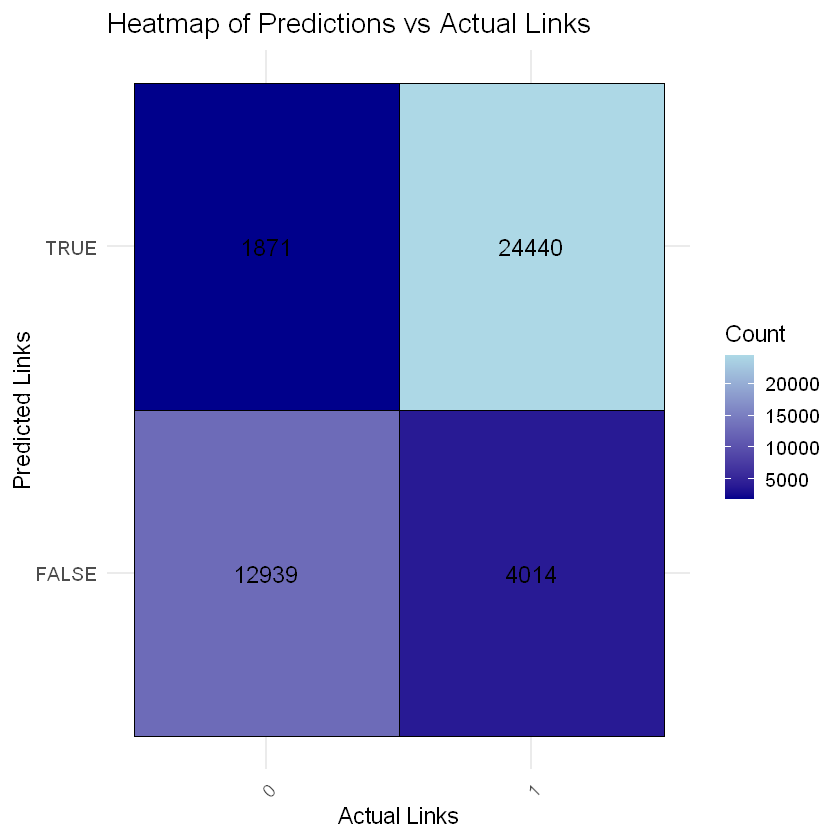

In [247]:
evaluations_df <- as.data.frame(as.table(evaluations))
colnames(evaluations_df) <- c("Predicted", "Actual", "Count")

# Create the heatmap with values displayed
ggplot(evaluations_df, aes(x = Actual, y = Predicted, fill = Count)) +
  geom_tile(color = "black") +  # Add a border around tiles
  scale_fill_gradient(low = "darkblue", high = "lightblue", name = "Count") +  # Set color gradient
  geom_text(aes(label = Count), color = "black", size = 5) +  # Add values in each box
  labs(title = "Heatmap of Predictions vs Actual Links",
       x = "Actual Links",
       y = "Predicted Links") +
  theme_minimal(base_size = 14) +  # Use a clean theme with larger text
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 

In [228]:
# give accuracym, total no of correct predictions, no of false predictins
accuracy<-sum(diag(evaluations))/sum(evaluations)
print(accuracy)

[1] 0.8639747


In [229]:
# total actual links
total_actual_links<-sum(actual_links)
total_actual_links


[1] 28454

In [230]:
# total predicted links
total_predicted_links<-sum(predic_links)
total_predicted_links

[1] 26311

In [177]:
predic_links_prob1<-as.vector(predicted_probabilities)
actual_links_prob1<-as.vector(actual_links)


In [178]:
valid_indices<-!is.na(actual_links_prob1) & !is.na(predic_links_prob1)  
actual_links_prob1<-actual_links_prob1[valid_indices]   
predic_links_prob1<-predic_links_prob1[valid_indices]

In [179]:
roc_data<-roc(actual_links_prob1,predic_links_prob1)
roc_data

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = actual_links_prob1, predictor = predic_links_prob1)

Data: predic_links_prob1 in 14810 controls (actual_links_prob1 0) < 28454 cases (actual_links_prob1 1).
Area under the curve: 0.8841

In [180]:
auc_value <- auc(roc_curve)
auc_value


Area under the curve: 0.8841

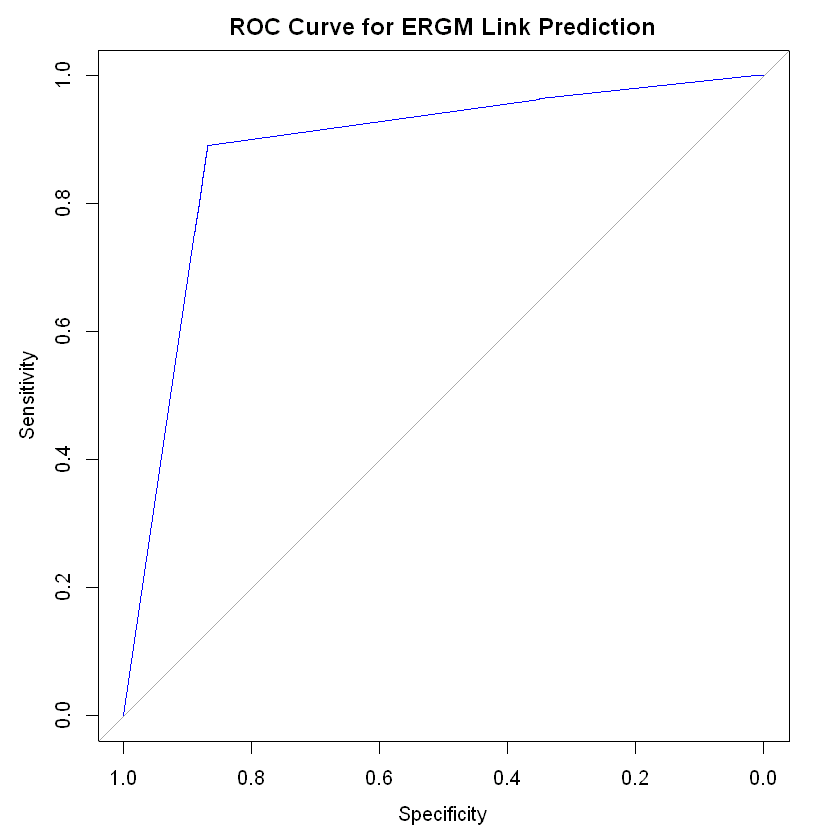

In [251]:
plot(
  roc_curve,
  main = "ROC Curve for ERGM Link Prediction",
  col = "blue",
  lwd = 1
)


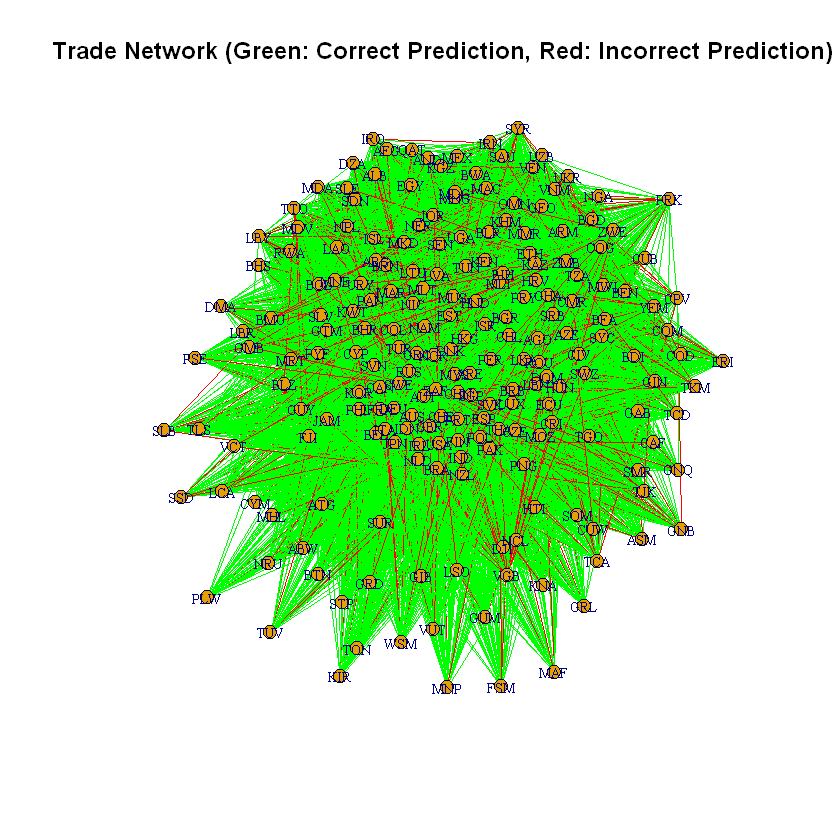

In [238]:
g <- graph_from_edgelist(as.matrix(data_aggregated_2019[, c("exporter_id", "importer_id")]), directed = TRUE)

# Step 7: Compare predicted links with actual links and assign edge colors
# Here, actual_links and predic_links should have the same structure: a vector or matrix of binary values (0 or 1)
# Create a vector to store the edge colors (green for correct, red for incorrect)
edge_colors <- ifelse(predic_links == actual_links, "green", "red")

# Step 8: Plot the graph with color-coded edges
plot(g, edge.color = edge_colors, 
     main = "Trade Network (Green: Correct Prediction, Red: Incorrect Prediction)",
     edge.arrow.size = 0.0, 
     vertex.size = 5, 
     vertex.label.cex = 0.7)

## COMPARING WITHOUT PROBABILITIES

In [182]:

actual_links <- as.data.frame(trade_network_2019, what = "edges")

# Ensure unique rows (remove duplicates if any)
actual_links <- unique(actual_links)


In [183]:
# # Convert the predicted links to data frame if not already
predicted_links_df <- as.data.frame(predicted_links)
# predicted<-as.data.frame(predicted)




In [184]:
# Remove duplicate rows from predicted links
 predicted_links_df <- unique(predicted_links_df)

In [185]:
colnames(predicted_links_df) <- c("exporter_id", "importer_id")
colnames(actual_links) <- c("exporter_id", "importer_id")

# Ensure the 'exporter_id' and 'importer_id' columns are of the same type
predicted_links_df$exporter_id <- as.character(predicted_links_df$exporter_id)
predicted_links_df$importer_id <- as.character(predicted_links_df$importer_id)
actual_links$exporter_id <- as.character(actual_links$exporter_id)
actual_links$importer_id <- as.character(actual_links$importer_id)

In [186]:
# Merge the predicted and actual links by exporter_id and importer_id
comparison <- merge(predicted_links_df, actual_links, by = c("exporter_id", "importer_id"))

# Number of correct predictions (links that are in both predicted and actual)
correct_predictions <- nrow(comparison)

# Total number of links in the actual data
total_actual_links <- nrow(actual_links)

# Precision, Recall, and F1-Score
precision <- correct_predictions / nrow(predicted_links_df)
recall <- correct_predictions / total_actual_links
f1_score <- 2 * (precision * recall) / (precision + recall)

# Print the comparison results
cat("Correct Predictions: ", correct_predictions, "\n")
cat("Total Actual Links: ", total_actual_links, "\n")
cat("Precision: ", precision, "\n")
cat("Recall: ", recall, "\n")
cat("F1-Score: ", f1_score, "\n")



Correct Predictions:  25169 
Total Actual Links:  28454 
Precision:  0.9192141 
Recall:  0.8845505 
F1-Score:  0.9015492 


In [234]:
sum(is.na(comparison$actual))  # Should be 0
sum(is.na(comparison$probability)) 

[1] 0

[1] 0

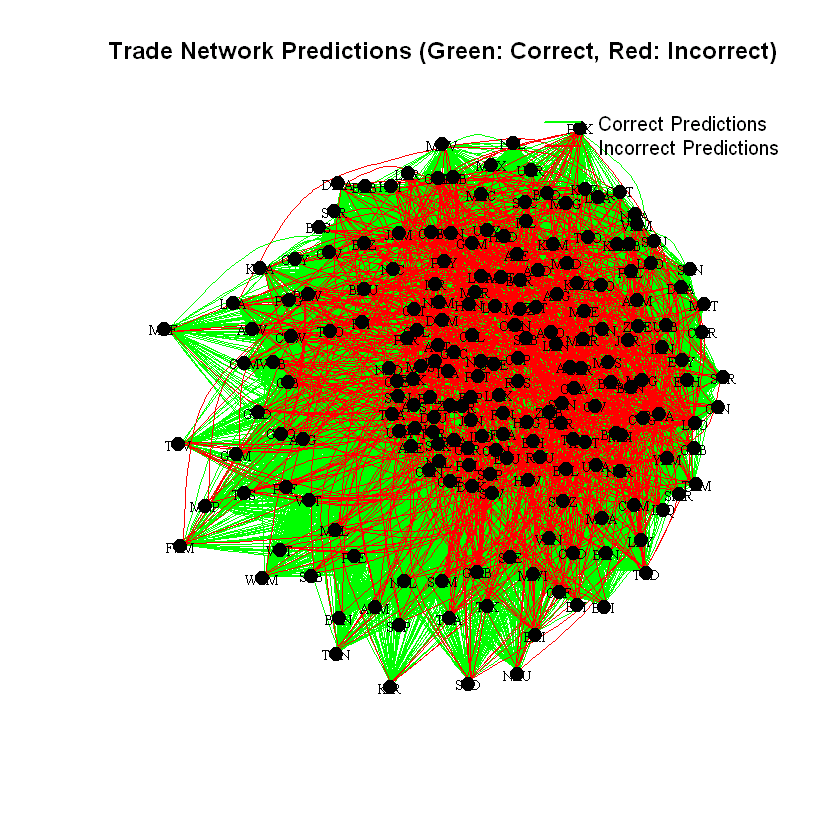

In [188]:
library(igraph)

# Load and check data
predicted_links_df$exporter_id <- as.character(predicted_links_df$exporter_id)
predicted_links_df$importer_id <- as.character(predicted_links_df$importer_id)
actual_links$exporter_id <- as.character(actual_links$exporter_id)
actual_links$importer_id <- as.character(actual_links$importer_id)

# Remove missing values
predicted_links_df <- na.omit(predicted_links_df)
actual_links <- na.omit(actual_links)

# Merge correct predictions
comparison <- merge(predicted_links_df, actual_links, by = c("exporter_id", "importer_id"))
correct_links <- comparison[, c("exporter_id", "importer_id")]
incorrect_links <- setdiff(predicted_links_df[, c("exporter_id", "importer_id")], correct_links)

# Combine all unique vertices
all_nodes <- unique(c(correct_links$exporter_id, correct_links$importer_id, 
                      incorrect_links$exporter_id, incorrect_links$importer_id))

# Create graph (undirected)
trade_igraph <- make_empty_graph(n = length(all_nodes), directed = FALSE)
V(trade_igraph)$name <- all_nodes

# Add correct edges with green color
if (nrow(correct_links) > 0) {
  trade_igraph <- add_edges(
    trade_igraph, 
    t(as.matrix(correct_links)), 
    color = "green",  # Correct edges are green
    width = 1        # Default width for correct edges
  )
}

# Add incorrect edges with red color
if (nrow(incorrect_links) > 0) {
  trade_igraph <- add_edges(
    trade_igraph, 
    t(as.matrix(incorrect_links)), 
    color = "red",    # Incorrect edges are red
    width = -1.0   # Highlight incorrect edges with a larger width
  )
}

# Set vertex color to black
V(trade_igraph)$color <- "black"

# Plot graph with improved layout, no arrows
plot(
  trade_igraph,
  main = "Trade Network Predictions (Green: Correct, Red: Incorrect)",
  edge.color = E(trade_igraph)$color,
  edge.width = E(trade_igraph)$width,
  vertex.size = 5,
  vertex.label.cex = 0.7,
  vertex.label.color = "black",
  vertex.color = V(trade_igraph)$color,
  layout = layout_with_fr(trade_igraph),
  edge.arrow.size = 0  # Remove arrows
)

# Add legend for clarity
legend(
  "topright",
  legend = c("Correct Predictions", "Incorrect Predictions"),
  col = c("green", "red"),
  lty = 1,
  lwd = 2,
  bty = "n"
)

Number of Correct Predictions: 25101 
Number of Incorrect Predictions: 2252 


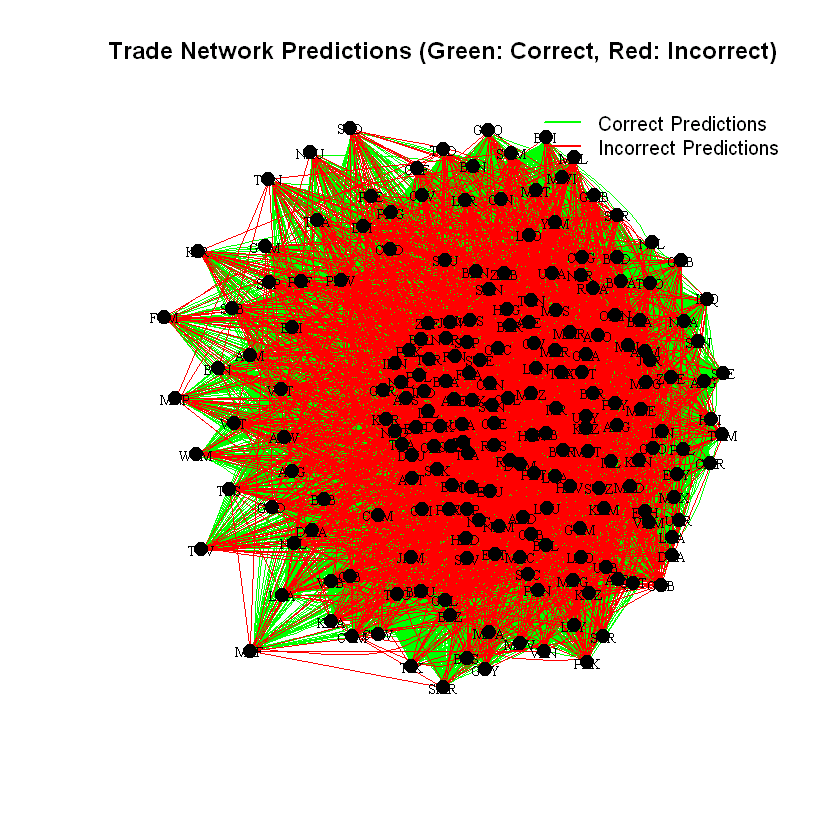

In [146]:
library(igraph)

# Load and check data
predicted_links_df$exporter_id <- as.character(predicted_links_df$exporter_id)
predicted_links_df$importer_id <- as.character(predicted_links_df$importer_id)
actual_links$exporter_id <- as.character(actual_links$exporter_id)
actual_links$importer_id <- as.character(actual_links$importer_id)

# Remove missing values
predicted_links_df <- na.omit(predicted_links_df)
actual_links <- na.omit(actual_links)

# Merge correct predictions
comparison <- merge(predicted_links_df, actual_links, by = c("exporter_id", "importer_id"))
correct_links <- comparison[, c("exporter_id", "importer_id")]
incorrect_links <- setdiff(predicted_links_df[, c("exporter_id", "importer_id")], correct_links)

# Print the number of correct and incorrect predictions
cat("Number of Correct Predictions:", nrow(correct_links), "\n")
cat("Number of Incorrect Predictions:", nrow(incorrect_links), "\n")

# Combine all unique vertices
all_nodes <- unique(c(correct_links$exporter_id, correct_links$importer_id, 
                      incorrect_links$exporter_id, incorrect_links$importer_id))

# Create graph (undirected)
trade_igraph <- make_empty_graph(n = length(all_nodes), directed = FALSE)
V(trade_igraph)$name <- all_nodes

# Add correct edges with green color
if (nrow(correct_links) > 0) {
  trade_igraph <- add_edges(
    trade_igraph, 
    t(as.matrix(correct_links)), 
    color = "green",  # Correct edges are green
    width = 1         # Default width for correct edges
  )
}

# Add incorrect edges with red color
if (nrow(incorrect_links) > 0) {
  trade_igraph <- add_edges(
    trade_igraph, 
    t(as.matrix(incorrect_links)), 
    color = "red",    # Incorrect edges are red
    width = 0.2    # Highlight incorrect edges with a larger width
  )
}

# Set vertex color to black
V(trade_igraph)$color <- "black"

# Plot graph with improved layout, no arrows
plot(
  trade_igraph,
  main = "Trade Network Predictions (Green: Correct, Red: Incorrect)",
  edge.color = E(trade_igraph)$color,
  edge.width = E(trade_igraph)$width,
  vertex.size = 5,
  vertex.label.cex = 0.7,
  vertex.label.color = "black",
  vertex.color = V(trade_igraph)$color,
  layout = layout_with_fr(trade_igraph),
  edge.arrow.size = 0  # Remove arrows
)

# Add legend for clarity
legend(
  "topright",
  legend = c("Correct Predictions", "Incorrect Predictions"),
  col = c("green", "red"),
  lty = 1,
  lwd = 2,
  bty = "n"
)